<a href="https://colab.research.google.com/github/theopenhighway/machinelearning-zoomcamp/blob/main/3_churn_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHURN PREDICTOR

Analyse customers' likeliness to stop using a service

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Binary Classification

g(x) ~ y

y = {0,1},
where 0 is customer no churned, 1 is churned

## Data Preparation

- download the data, read it with pandas
- look at the data
- make column names and values look uniform
- check if all the columns read correctly
- check if the churn variable needs any preparation

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ','_')
categoricalColumns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categoricalColumns:
  df[c] = df[c].str.lower().str.replace(' ','_')

In [ ]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [ ]:
df.totalcharges = pd.to_numeric(df.totalcharges,errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

In [ ]:
df.churn = (df.churn == 'yes').astype(int)

In [ ]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

## Setting Up the Validation Framework

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
dfFullTrain, dfTest = train_test_split(df, test_size=0.2, random_state=1)

In [ ]:
len(dfFullTrain),len(dfTest)

(5634, 1409)

In [ ]:
dfTrain, dfVal = train_test_split(dfFullTrain, test_size=0.25, random_state=1)

In [ ]:
len(dfFullTrain),len(dfTest), len(dfVal)

(5634, 1409, 1409)

In [ ]:
dfTrain = dfTrain.reset_index(drop=True)
dfVal = dfVal.reset_index(drop=True)
dfTest = dfTest.reset_index(drop=True)

In [ ]:
yTrain = dfTrain.churn.values
yVal = dfVal.churn.values
yTest = dfTest.churn.values

In [ ]:
# avoid using the variable onto the dataset
del dfTrain['churn']
del dfVal['churn']
del dfTest['churn']

## EDA
- check missing values
- look at the target variable (churn)
- look at numerical and categorical values

In [ ]:
dfFullTrain = dfFullTrain.reset_index(drop=True)

In [ ]:
dfFullTrain

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [ ]:
dfFullTrain.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [ ]:
globalChurnRate = dfFullTrain.churn.mean()
round(globalChurnRate,2)

0.27

In [ ]:
dfFullTrain.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [ ]:
numerical = ['tenure', 'monthlycharges','totalcharges' ]

In [ ]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']


In [ ]:
dfFullTrain[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature Importance
Identify which features affect our target variable
- churn rate
- risk ratio
- mutual information

### Churn rate

In [ ]:
dfFullTrain.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


Conclusion: gender doesn't affect churn rate

In [ ]:
churnFemale = dfFullTrain[dfFullTrain.gender == 'female'].churn.mean()
churnFemale

0.27682403433476394

In [ ]:
churnMale = dfFullTrain[dfFullTrain.gender == 'male'].churn.mean()
churnMale

0.2632135306553911

Churn rate is 6% higher than globalChurn when partner == 'no'

In [ ]:
churnPartnerY = dfFullTrain[dfFullTrain.partner == 'yes'].churn.mean()
churnPartnerY

0.20503330866025166

In [ ]:
churnPartnerN = dfFullTrain[dfFullTrain.partner == 'no'].churn.mean()
churnPartnerN

0.3298090040927694

### Risk Ratio

In [ ]:
churnPartnerN / globalChurnRate

1.2216593879412643

In [ ]:
churnPartnerY / globalChurnRate

0.7594724924338315

In [ ]:
from IPython.display import display

In [ ]:
for c in categorical:
  dfGroup = dfFullTrain.groupby(c).churn.agg(['mean','count'])
  dfGroup['diff'] = dfGroup['mean'] - globalChurnRate
  dfGroup['risk'] = dfGroup['mean'] / globalChurnRate
  display(dfGroup)

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


### Mutual Information

In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
mutual_info_score(dfFullTrain.churn, dfFullTrain.contract)

0.0983203874041556

In [ ]:
mutual_info_score(dfFullTrain.gender, dfFullTrain.churn)

0.0001174846211139946

In [ ]:
mutual_info_score(dfFullTrain.partner, dfFullTrain.churn)

0.009967689095399745

In [ ]:
def mutualInfoChurnScore(series):
  return mutual_info_score(series, dfFullTrain.churn)

In [ ]:
mi = dfFullTrain[categorical].apply(mutualInfoChurnScore)
mi.sort_values(ascending=False)

# contract - deviceprotection are factors that more likely to churn ppl out of a service

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### Correlation

In [ ]:
dfFullTrain.tenure.max()

72

In [ ]:
dfFullTrain[numerical].corrwith(dfFullTrain.churn)

# longer tenure, less likely to churn
# more totalcharges, less likely to churn
# higher the monthly charges, more likely to churn

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [ ]:
dfFullTrain[numerical].corrwith(dfFullTrain.churn).abs()


tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [ ]:
dfFullTrain[dfFullTrain.tenure <= 2].churn.mean()

0.5953420669577875

In [ ]:
dfFullTrain[(dfFullTrain.tenure > 2) & (dfFullTrain.tenure <= 12)].churn.mean()

0.3994413407821229

In [ ]:
dfFullTrain[dfFullTrain.tenure > 12].churn.mean()

0.17634908339788277

In [ ]:
dfFullTrain[dfFullTrain.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [ ]:
dfFullTrain[(dfFullTrain.tenure > 20) & (dfFullTrain.tenure <= 50)].churn.mean()

0.2147165259348613

In [ ]:
dfFullTrain[dfFullTrain.tenure > 50].churn.mean()

0.09025270758122744

## One-Hot Encoding

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
trainDicts = dfTrain[categorical + numerical].to_dict(orient='records')

In [ ]:
trainDicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [ ]:
dv = DictVectorizer(sparse=False)

In [ ]:
xTrain = dv.fit_transform(trainDicts)

In [ ]:
valDicts = dfVal[categorical + numerical].to_dict(orient='records')

In [ ]:
xVal = dv.transform(valDicts)

## Logistic Regression

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
z = np.linspace(-5,5,51)
z

array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
       -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
       -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
        1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
        3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ])

In [ ]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

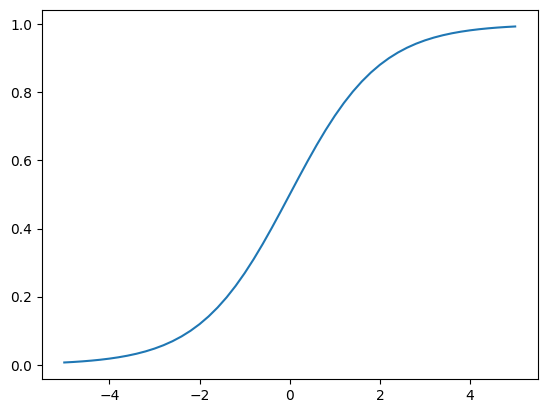

In [ ]:
plt.plot(z,sigmoid(z))

In [ ]:
def linRegres(xi):
  result = w0

  for j in range(len(w)):
    result = result + xi[j] * w[j]

  return result

In [ ]:
def linRegres(xi):
  score = w0

  for j in range(len(w)):
    score = score + xi[j] * w[j]

  result = sigmoid(score)
  return result

## Training Logistic Regression with Scikit-Learn

- train a model with scikit-learn
- apply it to the validation dataset
- calculate the accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(xTrain,yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.intercept_[0]

-0.1088935835655855

In [ ]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.029, -0.079,  0.063, -0.089, -0.082,
       -0.034, -0.073, -0.336,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.01 ,  0.063, -0.089, -0.082,  0.266, -0.089, -0.285, -0.232,
        0.124, -0.165,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.216, -0.121, -0.089,  0.102, -0.071, -0.089,  0.052,
        0.214, -0.089, -0.233, -0.071,  0.   ])

In [ ]:
# hard prediction
model.predict(xTrain)

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
# soft prediction
yPred = model.predict_proba(xVal)[:,1]

In [ ]:
churnDecision = (yPred >= 0.5)

In [ ]:
(yVal == churnDecision).mean()

0.8034066713981547

In [ ]:
# proof
dfPred = pd.DataFrame()
dfPred['probability'] = yPred
dfPred['prediction'] = churnDecision.astype(int)
dfPred['actual'] = yVal

dfPred

,probability,prediction,actual
0,0.008898,0,0
1,0.204770,0,0
2,0.212755,0,0
3,0.542723,1,1
4,0.214325,0,0
...,...,...,...
1404,0.311716,0,0
1405,0.039014,0,1
1406,0.135674,0,0
1407,0.799371,1,1


In [ ]:
dfPred['correct'] = dfPred.prediction == dfPred.actual

In [ ]:
dfPred.correct.mean()

0.8034066713981547

In [ ]:
churnDecision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

### Model Interpretation
- look at the coef

In [ ]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.029,
 'dependents=yes': -0.079,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.082,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.336,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.01,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.082,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.285,
 'paperlessbilling=no': -0.232,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.165,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.071,


In [ ]:
small = ['contract', 'tenure', 'monthlycharges']

In [ ]:
dfTrain[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [ ]:
dictsTrainSmall = dfTrain[small].to_dict(orient='records')
dictsValSmall = dfVal[small].to_dict(orient='records')

In [ ]:
dvSmall = DictVectorizer(sparse=False)
dvSmall.fit(dictsTrainSmall)

DictVectorizer(sparse=False)

In [ ]:
dvSmall.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [ ]:
xTrainSmall = dvSmall.transform(dictsTrainSmall)

In [ ]:
modelSmall = LogisticRegression()
modelSmall.fit(xTrainSmall, yTrain)

LogisticRegression()

In [ ]:
w0 = modelSmall.intercept_[0]
w0

-2.4767756620596773

In [ ]:
w = modelSmall.coef_[0]
w

array([ 0.97004492, -0.02513651, -0.94872202,  0.02748236, -0.03618424])

In [ ]:
dict(zip(dvSmall.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

## Using the Model

In [ ]:
dictFullTrain = dfFullTrain[categorical + numerical].to_dict(orient='records')
dictFullTrain

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [ ]:
dv = DictVectorizer(sparse=False)
xFullTrain = dv.fit_transform(dictFullTrain)

In [ ]:
yFullTrain = dfFullTrain.churn.values

In [ ]:
model = LogisticRegression().fit(xFullTrain, yFullTrain)

In [ ]:
dictTest = dfTest[categorical + numerical].to_dict(orient='records')
dictTest

[{'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'no',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'bank_transfer_(automatic)',
  'tenure': 41,
  'monthlycharges': 79.85,
  'totalcharges': 3320.75},
 {'gender': 'female',
  'seniorcitizen': 1,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'yes',
  'onlinebackup': 'no',
  'deviceprotection': 'no',
  'techsupport': 'no',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'bank_transfer_(automatic)',
  'tenure': 66,
  'monthlycharges': 102.4,
  'totalcharges': 6471.85},
 {'gend

In [ ]:
xTest = dv.fit_transform(dictTest)

In [ ]:
yPred = model.predict_proba(xTest)[:,1]

In [ ]:
churnDecision = (yPred >= 0.5)

In [ ]:
(churnDecision == yTest).mean()

0.815471965933286

In [ ]:
customer = dictTest[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [ ]:
xSmall = dv.transform([customer])

In [ ]:
xSmall.shape

(1, 45)

In [ ]:
model.predict_proba(xSmall)

array([[0.5943189, 0.4056811]])